In [1]:
import pandas as pd
import numpy as np

In [2]:
# credit to https://www.datacamp.com/community/tutorials/web-scraping-using-python
# The urllib.request module is used to open URLs. The Beautiful Soup package is used to extract data from html files.
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [4]:
# Extract the specific table required from the web page html
tables = soup.find_all('table', attrs={"class": "wikitable sortable"})                           

In [5]:
#Extract the rows from the table
for row in tables:
    row_td = row.find_all('tr')
type(row_td)

bs4.element.ResultSet

In [6]:
#Remove html coding from the rows and convcert to a string
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
type(cleantext)

str

In [7]:
#Split string up in relevant rows
list_rows = cleantext.split("\n,")

In [8]:
#Convert string rows into a dataframe
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[\nPostal Code\n\nBorough\n\nNeighborhood
1,\nM1A\n\nNot assigned\n\n
2,\nM2A\n\nNot assigned\n\n
3,\nM3A\n\nNorth York\n\nParkwoods
4,\nM4A\n\nNorth York\n\nVictoria Village
5,"\nM5A\n\nDowntown Toronto\n\nRegent Park, Har..."
6,"\nM6A\n\nNorth York\n\nLawrence Manor, Lawren..."
7,"\nM7A\n\nDowntown Toronto\n\nQueen's Park, On..."
8,\nM8A\n\nNot assigned\n\n
9,"\nM9A\n\nEtobicoke\n\nIslington Avenue, Humbe..."


In [9]:
# Split up cells in each row
df1 = df[0].str.split('\n', expand=True)
df1.head(5)


,0,1,2,3,4,5,6
0,[,Postal Code,,Borough,,Neighborhood,None
1,,M1A,,Not assigned,,,None
2,,M2A,,Not assigned,,,None
3,,M3A,,North York,,Parkwoods,None
4,,M4A,,North York,,Victoria Village,None


Drop Extra Columns

In [10]:
df2 = df1.drop([df1.index[0],df1.index[2],df1.index[4],df1.index[6]], axis=1)
df2.head(5)

,1,3,5
0,Postal Code,Borough,Neighborhood
1,M1A,Not assigned,
2,M2A,Not assigned,
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village


Rename Columns

In [11]:
df2.rename(columns={1: 'Postal Code', 3: 'Borough', 5: 'Neighborhood'}, inplace=True)
df2.head(5)

,Postal Code,Borough,Neighborhood
0,Postal Code,Borough,Neighborhood
1,M1A,Not assigned,
2,M2A,Not assigned,
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village


Drop Unneeded Rows

In [12]:
df3 = df2.drop(df2.index[0])
df4 = df3[df3.Borough != 'Not assigned']
df4.head(5)

,Postal Code,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [13]:
# Reset the index
df5 = df4.reset_index()
list(df5.columns) 

['index', 'Postal Code', 'Borough', 'Neighborhood']

In [14]:
# Remove the old index
df5.drop('index', axis=1, inplace=True)
df5.head(5)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [15]:
df5.shape

(103, 3)

In [16]:
# Pull in the csv with geospatial data
postCode = pd.read_csv('Geospatial_Coordinates.csv')
postCode.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [17]:
# Perform a merge of the tables
merged_left = pd.merge(left=df5, right=postCode, how='left', left_on='Postal Code', right_on='Postal Code')
merged_left.head(20)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [18]:
# 

In [37]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

!python -m pip install folium
!pip install branca
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


In [20]:
address = 'Toronto'

geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [21]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(merged_left['Latitude'], merged_left['Longitude'], merged_left['Borough'], merged_left['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Setup the Foursquare Method

In [22]:
CLIENT_ID = 'PSJJAAYGQ3JNLQYOIEWOHLHYYMGEWGO3PPLQQNS5C2DC5YVY' # your Foursquare ID
CLIENT_SECRET = '2DFU4VZ11BC4MBRTRHIDAMMWUBSJOJTM2WENUY3ONUO21JNC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PSJJAAYGQ3JNLQYOIEWOHLHYYMGEWGO3PPLQQNS5C2DC5YVY
CLIENT_SECRET:2DFU4VZ11BC4MBRTRHIDAMMWUBSJOJTM2WENUY3ONUO21JNC


In [23]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Get the Nearby Venues for each Neighborhood in Toronto

In [26]:
Toronto_venues = getNearbyVenues(names=merged_left['Neighborhood'],
                                   latitudes=merged_left['Latitude'],
                                   longitudes=merged_left['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [27]:
print(Toronto_venues.shape)
Toronto_venues.head()

(2127, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,TTC stop #8380,43.752672,-79.326351,Bus Stop
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [28]:
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
Berczy Park,56,56,56,56,56,56
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",18,18,18,18,18,18


In [29]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 272 uniques categories.


# Analyse Each Neighborhood

## One Hot Encoding

In [30]:
# one hot encoding
toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head(50)

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [31]:
toronto_onehot.shape

(2127, 272)

In [32]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').sum().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [33]:
toronto_grouped.shape

(96, 272)

In [34]:
#toronto_grouped.to_csv('out.csv')

## Which are the most popular businesses in Toronto?

In [35]:
#Drop Neighborhood column prior to doing some calcuations
busSum = toronto_grouped.copy()
busSum = busSum.drop(['Neighborhood'], axis=1)

# Sum by column
busSum.loc['Total',:]= busSum.sum(axis=0)

# Create simple dataframe with business and total count in Toronto
busSum = busSum.loc["Total"].copy()
busSum = pd.DataFrame(busSum)

# Sort desending, then create a dataframe with businesses that have a count of more than 20 in Toronto
busSum.sort_values(by=['Total'], inplace=True, ascending=False)
busSum20 = busSum[busSum.Total >19]
busSum20


,Total
Coffee Shop,177.0
Café,99.0
Restaurant,68.0
Pizza Place,52.0
Park,50.0
Italian Restaurant,46.0
Japanese Restaurant,42.0
Sandwich Place,42.0
Bakery,40.0
Clothing Store,36.0


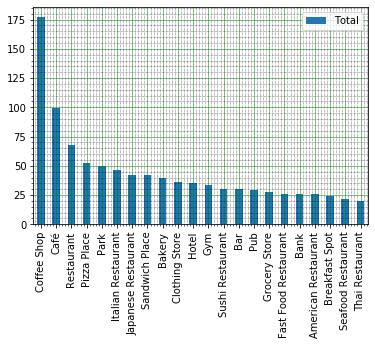

In [38]:
busSum20.plot(kind='bar')
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

## Which are the most popular Neighborhoods for business in Toronto?

In [39]:
#Quickly inset a sum column by row
neighSum = toronto_grouped.copy() #Create a copy of the original dataframe, otherwise it will be a reference
neighSum['Total'] = neighSum.sum(axis=1)

#Create a new df with columns from a df
neighSum = neighSum[['Neighborhood', 'Total']]

#Sort values by Total
neighSum.sort_values(by=['Total'], inplace=True, ascending=False)

#Drop Totals of less 30
neighSum30 = neighSum[neighSum.Total >30]
neighSum30

,Neighborhood,Total
84,"Toronto Dominion Centre, Design Exchange",100
29,"First Canadian Place, Underground city",100
18,"Commerce Court, Victoria Hotel",100
31,"Garden District, Ryerson",100
35,"Harbourfront East, Union Station, Toronto Islands",99
76,Stn A PO Boxes,93
65,"Richmond, Adelaide, King",92
73,St. James Town,79
15,Church and Wellesley,79
28,"Fairview, Henry Farm, Oriole",67


In [45]:
# Bring in the Coordinates for this table
Neigh30coord = pd.merge(left=neighSum30, right=df5, how='left', left_on='Neighborhood', right_on='Neighborhood')
Neigh30coord = pd.merge(left=Neigh30coord, right=postCode, how='left', left_on='Postal Code', right_on='Postal Code')
Neigh30coord

,Neighborhood,Total,Postal Code,Borough,Latitude,Longitude
0,"Toronto Dominion Centre, Design Exchange",100,M5K,Downtown Toronto,43.647177,-79.381576
1,"First Canadian Place, Underground city",100,M5X,Downtown Toronto,43.648429,-79.382280
2,"Commerce Court, Victoria Hotel",100,M5L,Downtown Toronto,43.648198,-79.379817
3,"Garden District, Ryerson",100,M5B,Downtown Toronto,43.657162,-79.378937
4,"Harbourfront East, Union Station, Toronto Islands",99,M5J,Downtown Toronto,43.640816,-79.381752
5,Stn A PO Boxes,93,M5W,Downtown Toronto,43.646435,-79.374846
6,"Richmond, Adelaide, King",92,M5H,Downtown Toronto,43.650571,-79.384568
7,St. James Town,79,M5C,Downtown Toronto,43.651494,-79.375418
8,Church and Wellesley,79,M4Y,Downtown Toronto,43.665860,-79.383160
9,"Fairview, Henry Farm, Oriole",67,M2J,North York,43.778517,-79.346556


In [46]:
# create map of Toronto using latitude and longitude values
map_torontoPop = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Neigh30coord['Latitude'], Neigh30coord['Longitude'], Neigh30coord['Borough'], Neigh30coord['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_torontoPop)  
    
map_torontoPop

## Table with Top Ten Neighborhoods and Business Count

In [122]:
busNeigh10 = toronto_grouped.copy()
busNeigh10['Total'] = busNeigh10.sum(axis=1)
busNeigh10.sort_values(by=['Total'], inplace=True, ascending=False)
busNeigh10 = busNeigh10[busNeigh10.Total >50]

busNeigh10.loc['TotalR',:]= busNeigh10.sum(axis=0, numeric_only = True)

busNeigh10 = busNeigh10.sort_values(by ='TotalR', axis=1, ascending = False, na_position = 'first')

busNeigh10.drop([col for col, val in busNeigh10.sum().iteritems() if val < 30], axis=1, inplace=True)
#busNeigh10 = busNeigh10.drop(['Total'], axis=1)
busNeigh10 = busNeigh10.drop(['TotalR'], axis=0)

busNeigh10.reset_index(inplace = True) 
busNeigh10 = busNeigh10.drop(['index'], axis=1)
busNeigh10


,Neighborhood,Total,Coffee Shop,Café,Restaurant,Hotel,Japanese Restaurant,Clothing Store,Italian Restaurant,Seafood Restaurant,Bakery,Gym,American Restaurant,Beer Bar,Sushi Restaurant
0,"Toronto Dominion Centre, Design Exchange",100.0,10.0,6.0,4.0,6.0,3.0,1.0,3.0,3.0,2.0,1.0,3.0,2.0,2.0
1,"First Canadian Place, Underground city",100.0,10.0,8.0,4.0,4.0,4.0,0.0,1.0,3.0,1.0,4.0,3.0,2.0,2.0
2,"Commerce Court, Victoria Hotel",100.0,11.0,7.0,7.0,5.0,3.0,0.0,3.0,3.0,2.0,4.0,4.0,2.0,0.0
3,"Garden District, Ryerson",100.0,8.0,3.0,1.0,2.0,3.0,9.0,3.0,1.0,2.0,1.0,0.0,1.0,0.0
4,"Harbourfront East, Union Station, Toronto Islands",99.0,13.0,4.0,3.0,4.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0
5,Stn A PO Boxes,93.0,9.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,2.0,2.0,1.0,3.0,1.0
6,"Richmond, Adelaide, King",92.0,10.0,5.0,4.0,3.0,1.0,3.0,0.0,1.0,2.0,3.0,2.0,0.0,2.0
7,St. James Town,79.0,5.0,5.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0,0.0
8,Church and Wellesley,79.0,6.0,2.0,3.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
9,"Fairview, Henry Farm, Oriole",67.0,5.0,0.0,3.0,0.0,3.0,10.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [163]:
tableMean = busNeigh10.Total.mean()
tableMean

83.53846153846153

In [243]:
import numpy as np

neighSum = busNeigh10.Total
underServed = busNeigh10.copy()
for column in underServed.iloc[0:12 , 2:15]:
    underServed[column] = (underServed[column]/underServed[column].mean())*(neighSum/tableMean) 

underServed = underServed.drop(['Total'], axis=1)
    


def color_negative_red(val):
    if isinstance(val, float):
        color = 'red' if val<0.8 else 'black'
        return 'color: %s' % color
    else:
        color = 'black'
        return 'color: %s' % color

underServed = underServed.style.applymap(color_negative_red)
underServed

,Neighborhood,Coffee Shop,Café,Restaurant,Hotel,Japanese Restaurant,Clothing Store,Italian Restaurant,Seafood Restaurant,Bakery,Gym,American Restaurant,Beer Bar,Sushi Restaurant
0,"Toronto Dominion Centre, Design Exchange",1.46808,1.69764,1.63807,3.01194,1.50597,0.555775,2.12205,2.33425,1.63807,0.864539,2.59362,1.94521,2.07489
1,"First Canadian Place, Underground city",1.46808,2.26352,1.63807,2.00796,2.00796,0,0.70735,2.33425,0.819037,3.45815,2.59362,1.94521,2.07489
2,"Commerce Court, Victoria Hotel",1.61489,1.98058,2.86663,2.50995,1.50597,0,2.12205,2.33425,1.63807,3.45815,3.45815,1.94521,0
3,"Garden District, Ryerson",1.17447,0.84882,0.409518,1.00398,1.50597,5.00197,2.12205,0.778085,1.63807,0.864539,0,0.972606,0
4,"Harbourfront East, Union Station, Toronto Islands",1.88942,1.12044,1.21627,1.98788,0.49697,0,2.10083,0.770304,0.810846,0.855893,0,0.96288,1.02707
5,Stn A PO Boxes,1.22879,1.05254,1.14256,0.933702,1.40055,0.516871,1.97351,2.17086,1.52341,1.60804,0.804021,2.71357,0.964825
6,"Richmond, Adelaide, King",1.35064,1.30152,1.50703,1.38549,0.461831,1.53394,0,0.715838,1.50703,2.38613,1.59075,0,1.9089
7,St. James Town,0.579893,1.11761,0.970558,0.396572,0.396572,0.878124,1.11761,1.22937,0.647039,1.36597,2.04896,1.53672,0
8,Church and Wellesley,0.695872,0.447045,0.970558,0.793144,1.98286,0.439062,0,0,0,0,0.682985,0.768359,4.09791
9,"Fairview, Henry Farm, Oriole",0.491808,0,0.823132,0,1.009,3.72369,0,0,0.548754,0,0.579241,0,0


# END